In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
# Part 1: Bagging Technique - Create K = 100 training sets
num_trees = 100 # K
tree_models = []

# Parameters for Decision Tree
rf_params = {
    "criterion": "entropy",
    "splitter": "best",
    "max_depth": None,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "max_features": None,
    "random_state": 42,
    "max_leaf_nodes": None
}

for i in range(num_trees):
    # Create a bootstrapped training set
    indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_train_bagged = X_train[indices]
    y_train_bagged = y_train[indices]

    # Build a Decision Tree for each training set
    dt = DecisionTreeClassifier(**rf_params)
    dt.fit(X_train_bagged, y_train_bagged)
    tree_models.append(dt)

In [85]:
# Part 2: Classify data from the testing set
# Individual Tree
random_tree_index = np.random.choice(num_trees)
random_tree = tree_models[random_tree_index]
y_pred_single_tree = random_tree.predict(X_test)

# Ensemble of Trees
y_pred_ensemble = np.mean([tree.predict(X_test) for tree in tree_models], axis=0)
y_pred_ensemble = np.round(y_pred_ensemble)  # for binary classification

In [86]:
# Part 3: Calculate the error of classification
error_single_tree = 1 - accuracy_score(y_test, y_pred_single_tree)
error_ensemble = 1 - accuracy_score(y_test, y_pred_ensemble)

Report for Single Tree:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy for Single Tree: 0.956140350877193
Error for Single Tree: 0.04385964912280704
Confusion Matrix for Single Tree:
[[40  3]
 [ 2 69]]


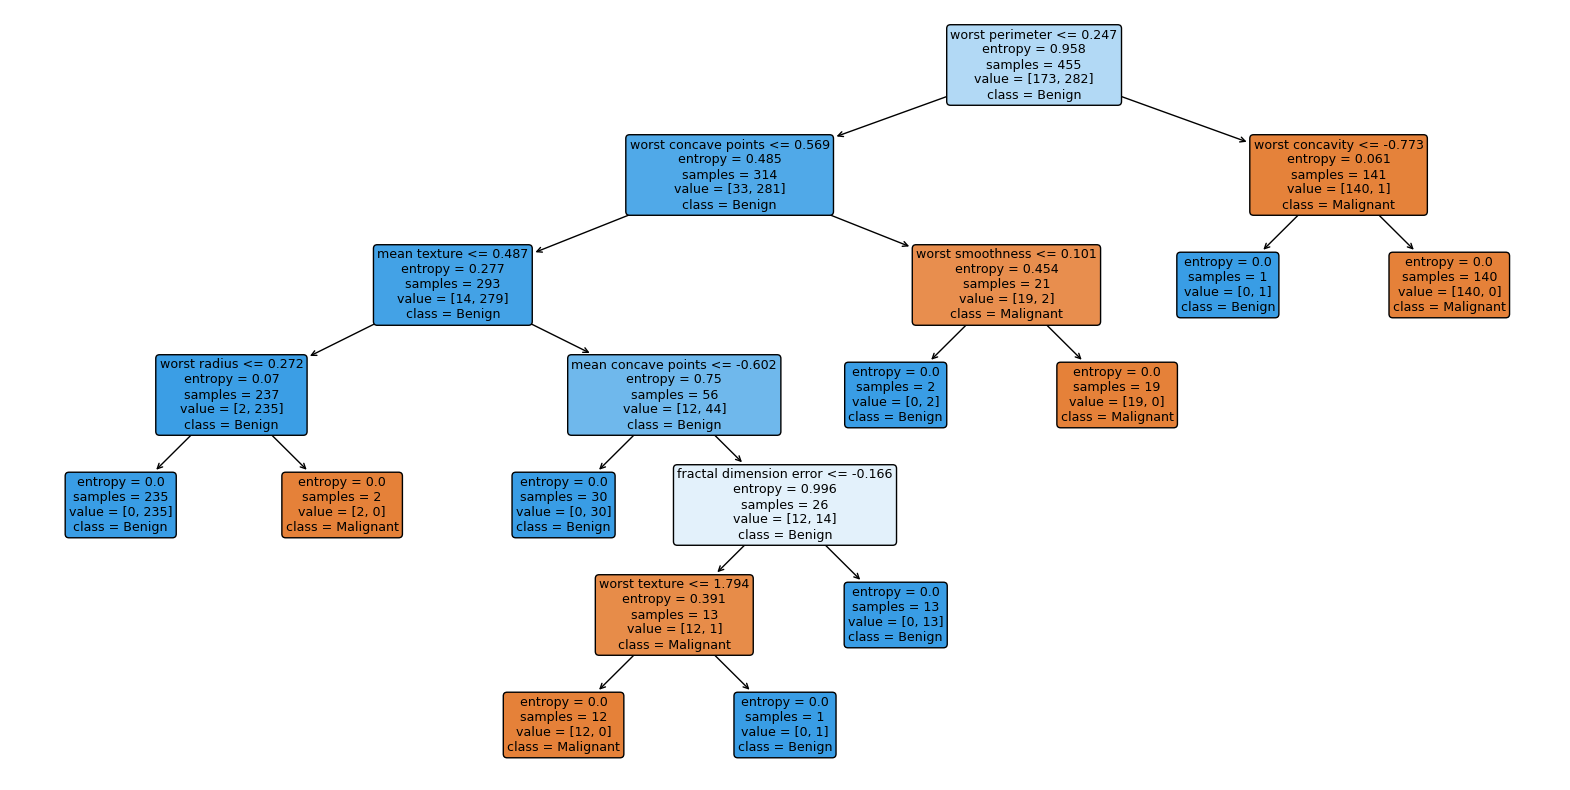

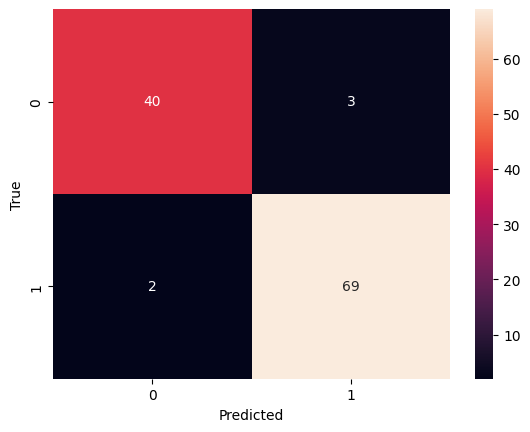

In [87]:
# Part 4: Report, Accuracy, Error, Confusion Matrix for Single Tree
print("Report for Single Tree:")
print(classification_report(y_test, y_pred_single_tree))
print("Accuracy for Single Tree:", accuracy_score(y_test, y_pred_single_tree))
print("Error for Single Tree:", error_single_tree)
print("Confusion Matrix for Single Tree:")
print(confusion_matrix(y_test, y_pred_single_tree))

# plot the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(random_tree, filled=True, rounded=True, class_names=['Malignant', 'Benign'], feature_names=data.feature_names)
plt.show()

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred_single_tree)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

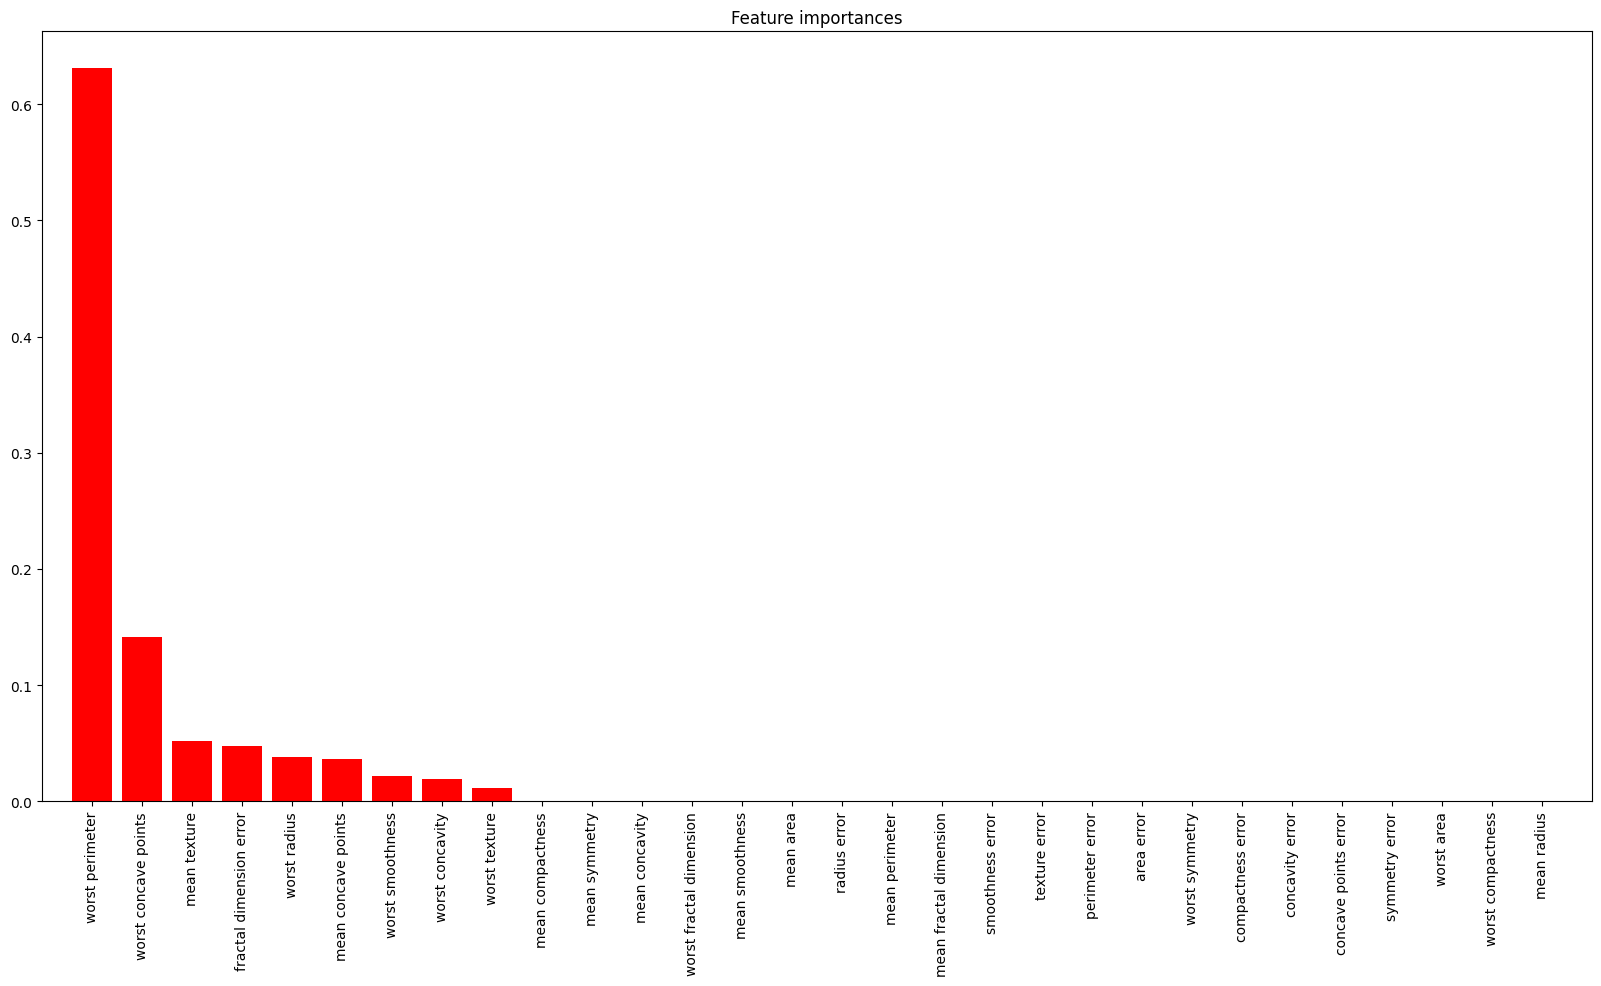

In [91]:
# plot feature importance
importances = random_tree.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(20, 10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), data.feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

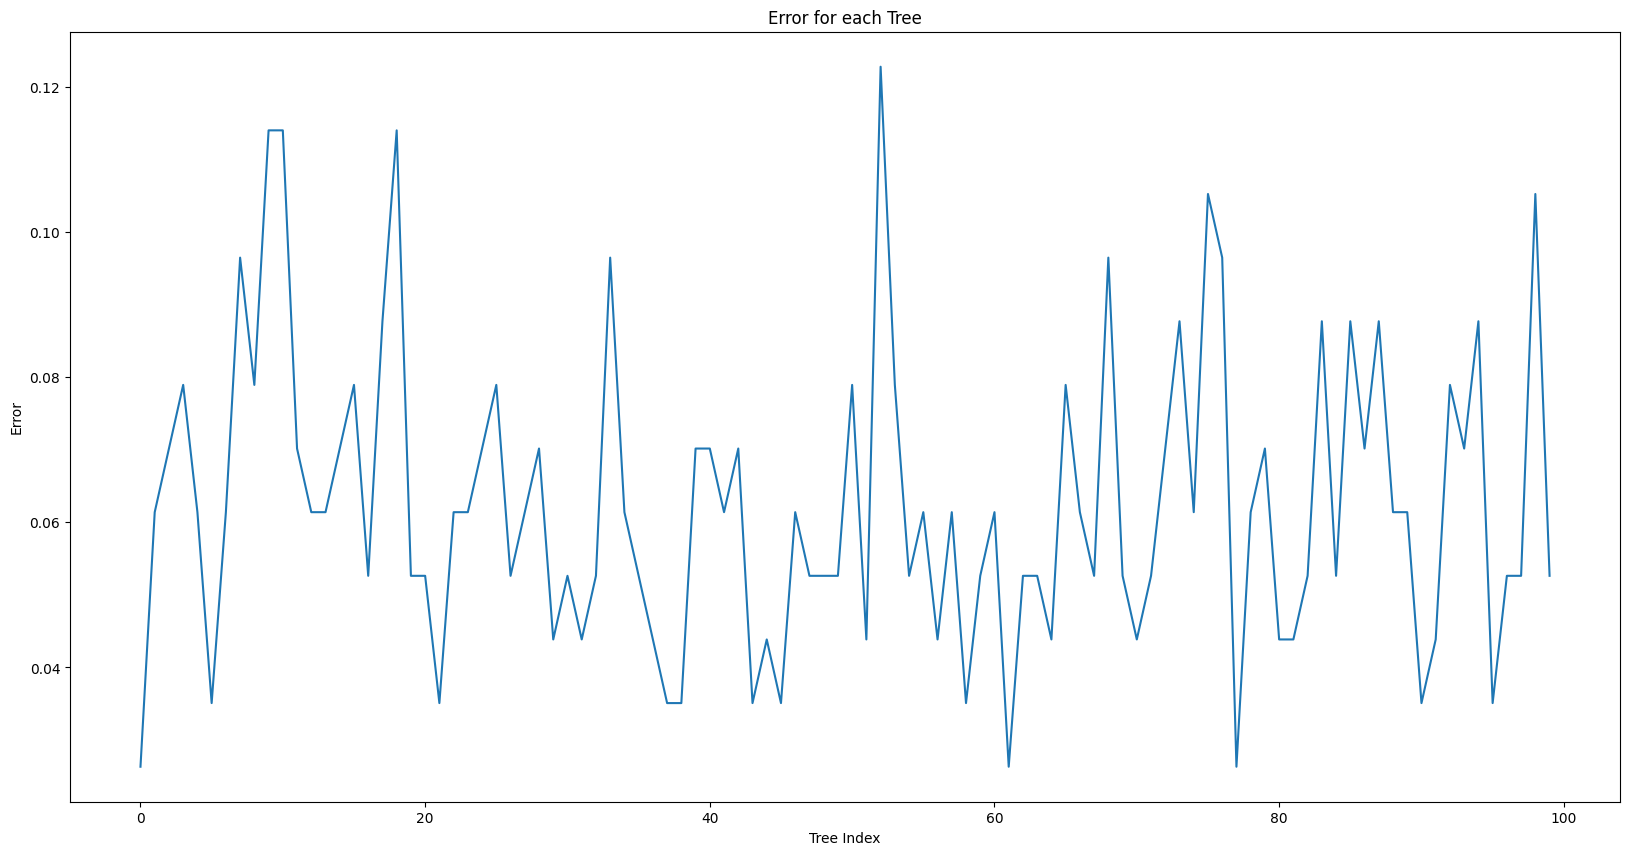

In [88]:
# plot line graph for error for each trees
error_list = []
for i in range(num_trees):
    y_pred = tree_models[i].predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    error_list.append(error)

plt.figure(figsize=(20, 10))
plt.plot(error_list)
plt.xlabel('Tree Index')
plt.ylabel('Error')
plt.title('Error for each Tree')
plt.show()


Report for Ensemble of Trees:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy for Ensemble of Trees: 0.9649122807017544
Error for Ensemble of Trees: 0.03508771929824561
Confusion Matrix for Ensemble of Trees:
[[40  3]
 [ 1 70]]


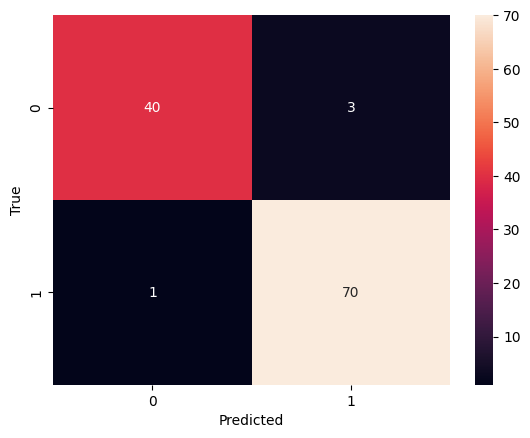

In [89]:
# Part 5: Report, Accuracy, Error, Confusion Matrix for Ensemble
print("\nReport for Ensemble of Trees:")
print(classification_report(y_test, y_pred_ensemble))
print("Accuracy for Ensemble of Trees:", accuracy_score(y_test, y_pred_ensemble))
print("Error for Ensemble of Trees:", error_ensemble)
print("Confusion Matrix for Ensemble of Trees:")
print(confusion_matrix(y_test, y_pred_ensemble))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Part 6: Store Individual Trees (Optional)
# tree_models contains all the individual trees trained on different bagged datasets
# You can store them if needed